In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('Netflix_price.csv')
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


,0
Country_code,0
Country,0
Total Library Size,0
No. of TV Shows,0
No. of Movies,0
Cost Per Month - Basic ($),0
Cost Per Month - Standard ($),0
Cost Per Month - Premium ($),0


In [7]:
df.columns

Index(['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'],
      dtype='object')

In [8]:
df_clean = df.drop(['Country_code', 'Country'], axis=1)

print(df_clean.isnull().sum())

df_clean = df_clean.dropna()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

scaled_df = pd.DataFrame(scaled_features, columns=df_clean.columns)

scaled_df.head()

Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64


,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,-0.569945,-0.508698,-0.583403,-2.407078,-2.002208,-1.584480
1,0.821982,0.740209,0.826902,-0.274832,0.045745,0.193810
2,0.334704,0.362470,0.201811,0.344040,0.943043,1.173990
3,-0.333503,-0.202047,-0.552610,0.931708,1.143616,1.173990
4,-0.332474,-0.507304,0.124829,-0.196823,-0.351882,-0.404772


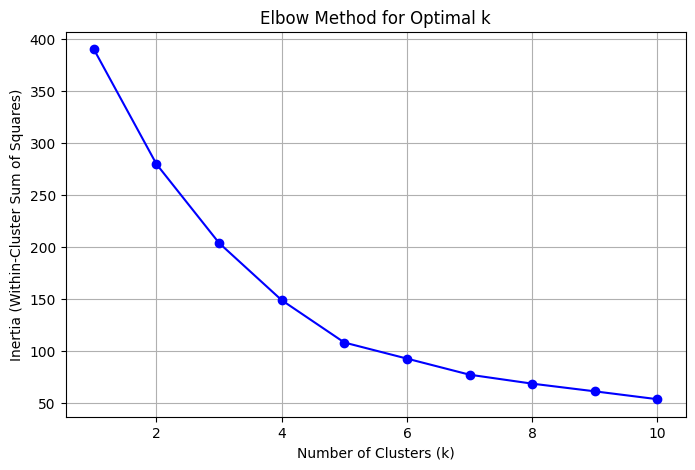

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [10]:
# Apply KMeans with k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

df['Cluster'] = cluster_labels

df[['Country', 'Cluster']].head(10)

,Country,Cluster
0,Argentina,2
1,Australia,0
2,Austria,4
3,Belgium,4
4,Bolivia,1
5,Brazil,2
6,Bulgaria,0
7,Canada,0
8,Chile,1
9,Colombia,2


In [11]:
df['Cluster'].value_counts()

,count
Cluster,
1,23
4,16
0,16
2,7
3,3


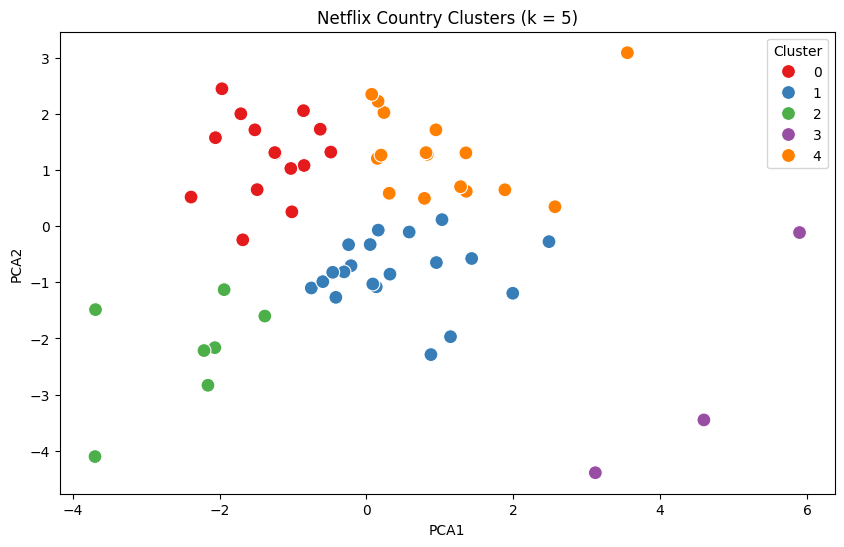

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title('Netflix Country Clusters (k = 5)')
plt.show()

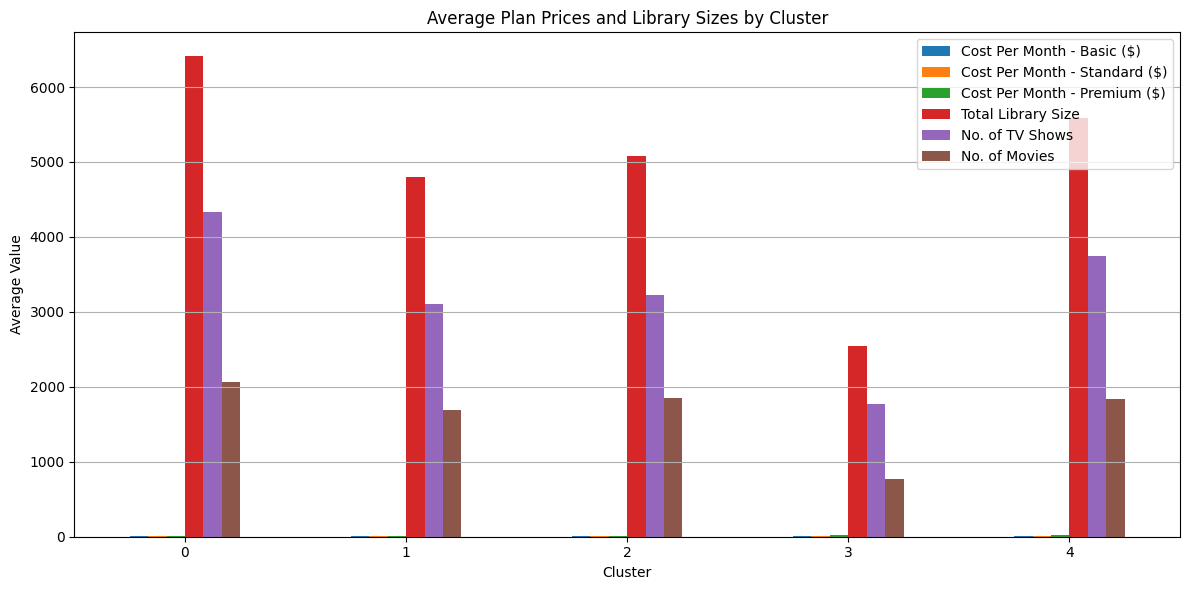

In [13]:

cluster_summary = df.groupby('Cluster')[
    ['Cost Per Month - Basic ($)',
     'Cost Per Month - Standard ($)',
     'Cost Per Month - Premium ($)',
     'Total Library Size',
     'No. of TV Shows',
     'No. of Movies']
].mean()


cluster_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Average Plan Prices and Library Sizes by Cluster')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
